In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
# first let's create the start state 
state = np.zeros((7))
state[3] = 1
state

seq = state
seq

loc = np.argwhere(state)
loc = loc[0][0]
loc

sequence_array = []

In [3]:
all_array = []

for j in range(100):
    sequence_array = []
    i = 0
    while i < 10:
        state = np.zeros((7), dtype=np.int)
        state[3] = 1
        seq = state
        loc = np.argwhere(state)[0][0]

        while loc != 0 and loc != state.shape[0] - 1:
            if np.random.rand() <= 0.5:
                loc += -1
            else:
                loc += 1
            state = np.zeros(7)
            state[loc] = 1
            seq = np.vstack((seq, state))
        
        if seq.shape[0] < 15:
            sequence_array.append(seq)
            i += 1
    all_array.append(sequence_array)
# print all_array[0]


In [4]:
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

In [5]:
Z = np.array([0., 1./6, 1./3, 1./2, 2./3, 5./6, 1])


# for i in range(10):
# sequence = ten_sequence[i]
alpha = 0.4
lam = 0

rm_all = np.zeros(len(all_array))
alphas = np.linspace(0,0.6,70)
lambdas = [0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.]
lam_rmse = np.zeros((11, 70))



for lm in range(len(lambdas)):
    lam = lambdas[lm]
    al_rm = []

    for al in range(len(alphas)):
        alpha = alphas[al]        
        # this is the start of all
        for ten_index in range(len(all_array)):
            
            
            w_0 = np.array([0, 1./2, 1./2, 1./2, 1./2, 1./2, 1])
            ten_sequence = all_array[ten_index]
            
            # this is an sequence of ten
            for seq_index in range(len(all_array[0])):
                
                e_s = np.zeros(7)
                # an episode
                sequence = ten_sequence[seq_index]
                val_update = np.zeros(7)
                # this is a sequence
                for t in range(len(sequence)-1):

                    delta = (w_0[sequence[t+1] == 1] - w_0[sequence[t] == 1])[0]
                    e_s[sequence[t] == 1] = e_s[sequence[t] == 1] + 1
                    for w in range(len(w_0)):
                        val_update[w] = val_update[w] + alpha * delta * e_s[w]
                        e_s[w] = lam * e_s[w]
                
                w_0 = w_0 + val_update
            rm = rmse(w_0[1:-1], Z[1:-1])
            rm_all[ten_index] = rm
            # print w_0
        al_rm.append(np.mean(rm_all))
    lam_rmse[lm,:] = al_rm
    # print alpha, lam, al_rm
print lam_rmse

[[0.23570226 0.22369875 0.21224428 0.20129187 0.19080717 0.18076581
  0.17115137 0.16195377 0.15316793 0.14479284 0.13683074 0.12928643
  0.12216685 0.1154806  0.10923765 0.10344903 0.09812665 0.093283
  0.08893096 0.08508344 0.081753   0.07895102 0.07668667 0.07496537
  0.07378732 0.0731469  0.07303282 0.07342665 0.07429817 0.07560458
  0.07729479 0.07931572 0.081619   0.0841648  0.0869228  0.08987177
  0.09299852 0.09629653 0.09976429 0.1034042  0.10722201 0.11122651
  0.1154291  0.11984325 0.12448405 0.12936855 0.1345166  0.13995219
  0.1457048  0.1518107  0.15831435 0.16526965 0.1727411  0.1808042
  0.1895443  0.1990535  0.20942815 0.22077058 0.23319647 0.24684544
  0.26189134 0.27854783 0.29708293 0.31790901 0.34173988 0.36908284
  0.40003217 0.43479706 0.47369775 0.51711184]
 [0.23570226 0.22306322 0.2109998  0.19947721 0.18846933 0.17795712
  0.16792739 0.15837173 0.14928572 0.1406682  0.13252073 0.12484711
  0.11765303 0.11094575 0.10473384 0.09902698 0.09383569 0.08917121
  0.

In [6]:
rms_lambdas = lam_rmse

In [7]:
q = np.min(rms_lambdas, axis=1)
l = np.argmin(rms_lambdas, axis=1)
print np.linspace(0, 0.6, 100)[l]
q

[0.15757576 0.15151515 0.14545455 0.13939394 0.12727273 0.12121212
 0.10909091 0.0969697  0.08484848 0.07272727 0.05454545]


array([0.07303282, 0.07195088, 0.07185374, 0.07288796, 0.0752267 ,
       0.07929907, 0.0856702 , 0.09498177, 0.10803761, 0.12625974,
       0.15133476])

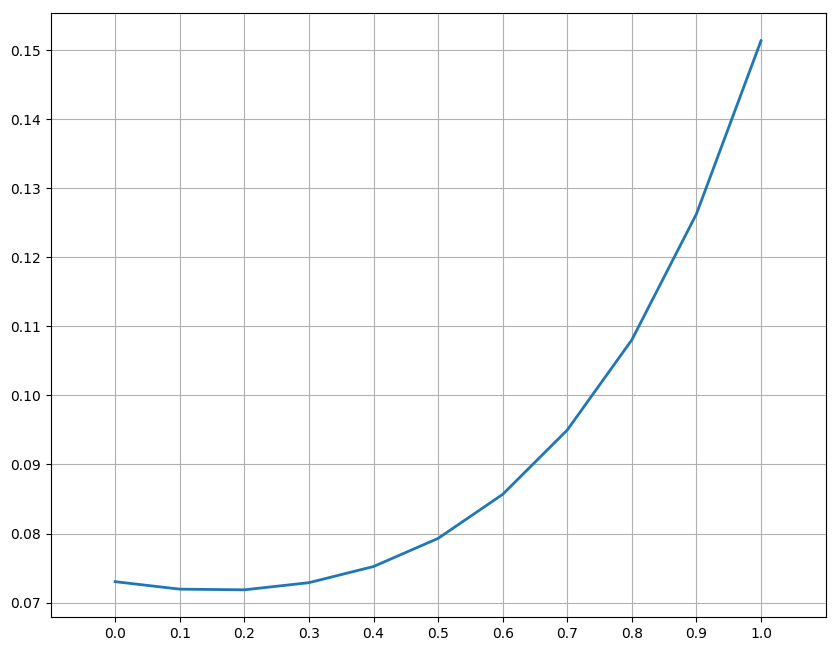

In [9]:
X = np.linspace(0, 1, 11)
# create a new figure of size 10 x 8 points using 100 dots per inch
plt.figure(figsize=(10,8), dpi=100)

# create a new subplot from a grid of 1x1
plt.subplot(111)

plt.plot(X, q, linewidth=2.0, label="lambda=0")

# set x limits
plt.xlim(-0.1, 1.1)

# set x ticks
plt.xticks(np.linspace(0,1.0,11))

# set y limits
#plt.ylim(0.08, 0.2)

# set legend
# plt.legend(loc='upper left')

# add grids
plt.grid()

